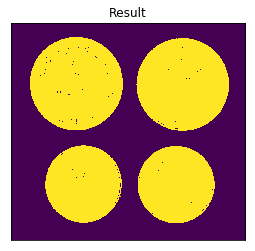

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


## We start with finding an approximate estimate of the coins. For that, we can use the Otsu’s binarization.
img = cv2.imread("coins.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(thresh)
plt.title('Result')
plt.xticks([]), plt.yticks([])

plt.show()

### Noise Removal

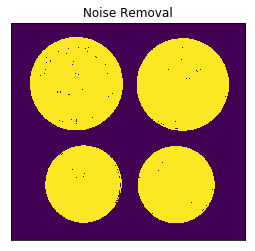

In [27]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2) 

plt.imshow(opening)
plt.title("Noise Removal")
plt.xticks([]), plt.yticks([])

plt.show()

### Sure background area

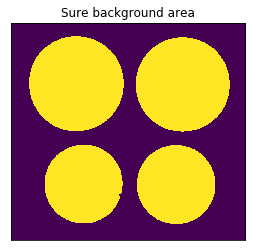

In [28]:
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

plt.imshow(sure_bg)
plt.title("Sure background area")
plt.xticks([]), plt.yticks([])

plt.show()

### Sure foreground area

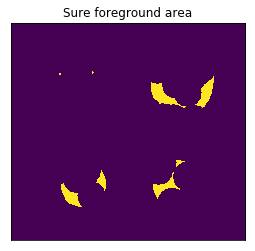

In [29]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

plt.imshow(sure_fg)
plt.title("Sure foreground area")
plt.xticks([]), plt.yticks([])

plt.show()

### Finding unknown region

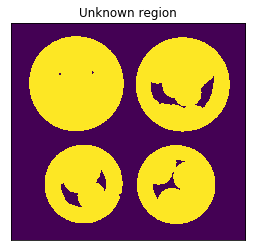

In [30]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.imshow(unknown)
plt.title("Unknown region")
plt.xticks([]), plt.yticks([])

plt.show()

### Marker labelling

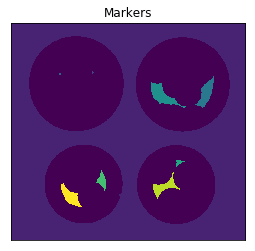

In [31]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers)
plt.title("Markers")
plt.xticks([]), plt.yticks([])

plt.show()

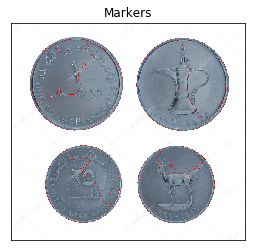

In [32]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img)
plt.title("Markers")
plt.xticks([]), plt.yticks([])

plt.show()